# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Faaris Muda Dwi Nugraha
- **Email:** faarismudadwinugraha@gmail.com / faarismudawork@gmail.com
- **ID Dicoding:** faarismuda

## Menentukan Pertanyaan Bisnis

**1. "Bagaimana performa rata-rata waktu pengiriman di tiap kota pada tahun 2017, dan apakah ada kota dengan waktu pengiriman lebih dari 10 hari yang dapat memperburuk kepuasan pelanggan?"**

- **Specific**: Fokus pada analisis waktu pengiriman di tiap kota pada tahun 2017.
- **Measurable**: Mengukur rata-rata waktu pengiriman dan identifikasi kota dengan waktu pengiriman lebih dari 10 hari.
- **Action-oriented**: Dapat digunakan untuk mengidentifikasi area yang memerlukan perbaikan dalam hal logistik dan pengiriman.
- **Relevant**: Mengoptimalkan waktu pengiriman untuk meningkatkan pengalaman pelanggan dan kepuasan.
- **Time-bound**: Membatasi analisis pada tahun 2017.

**Teknik Analisis Lanjutan**:
- **Geospatial Analysis**: Menganalisis lokasi dan waktu pengiriman menggunakan data dari `orders_dataset.csv` dan `geolocation_dataset.csv`.
    - Membuat **heatmap** untuk menunjukkan waktu pengiriman di setiap kota.
    - Menghitung **rata-rata waktu pengiriman** per kota dan mengidentifikasi **outlier**.


**2. "Apa hubungan antara frekuensi pembelian pelanggan dan total pengeluaran mereka di tahun 2017, dan bagaimana pola ini memengaruhi segmentasi pelanggan yang paling menguntungkan?"**

- **Specific**: Fokus pada analisis frekuensi pembelian dan total pengeluaran pelanggan di tahun 2017.
- **Measurable**: Menghitung frekuensi pembelian dan total pengeluaran pelanggan.
- **Action-oriented**: Membantu dalam membuat strategi pemasaran yang ditujukan untuk segmen pelanggan yang menguntungkan.
- **Relevant**: Penting untuk strategi retensi pelanggan dan peningkatan pendapatan.
- **Time-bound**: Fokus pada data tahun 2017.

**Teknik Analisis Lanjutan**:
- **RFM Analysis**: Mengukur **recency**, **frequency**, dan **monetary** untuk memahami segmentasi pelanggan berdasarkan perilaku pembelian.
    - Menganalisis dataset untuk menghitung **frekuensi** dan **total pengeluaran**.
    - Segmentasi pelanggan berdasarkan frekuensi pembelian dan total pengeluaran untuk mengidentifikasi kelompok yang paling menguntungkan.


**3. "Produk kategori mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan selama Q1 2017, dan apakah ada kategori dengan tingkat pengembalian produk (return rate) yang lebih tinggi?"**

- **Specific**: Fokus pada kontribusi pendapatan berdasarkan kategori produk selama Q1 2017.
- **Measurable**: Menghitung kontribusi pendapatan dari tiap kategori produk dan mengukur tingkat pengembalian produk.
- **Action-oriented**: Menyediakan informasi untuk perbaikan manajemen inventaris dan pengelolaan kategori produk.
- **Relevant**: Membantu dalam memprioritaskan kategori produk untuk strategi pemasaran dan pengelolaan produk.
- **Time-bound**: Fokus pada periode Q1 2017.

**Teknik Analisis Lanjutan**:
- **Clustering**: Mengelompokkan produk berdasarkan kategori dan kontribusi pendapatan untuk melihat pola kategori yang lebih menguntungkan.
    - Menganalisis data dataset untuk menghitung kontribusi pendapatan berdasarkan kategori produk.
    - Mengukur **tingkat pengembalian produk** dan mengidentifikasi kategori dengan **return rate** tinggi.

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install contextily
import contextily as ctx

## Data Wrangling

### Gathering Data

In [17]:
# Baca data dari file CSV
customers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/customers_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/product_category_name_translation.csv")
products = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/products_dataset.csv")
sellers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/sellers_dataset.csv")

**Q1**

In [ ]:
# Filter orders dari tahun 2017
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders_2017 = orders[orders['order_year'] == 2017]

# Hitung waktu pengiriman
orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days

# Gabungkan orders dengan customers untuk mendapatkan informasi kota
orders_customers = pd.merge(orders_2017, customers, on='customer_id', how='left')

# Gabung dengan reviews untuk mendapatkan skor review
orders_customers_reviews = pd.merge(orders_customers, order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Gabung dengan geolocation untuk mendapatkan latitude dan longitude
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_city'])
merged_data = pd.merge(orders_customers_reviews, geolocation_unique,
                       left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix',
                       how='left')

# Final dataset
data_q1 = merged_data[['order_id', 'customer_city', 'delivery_duration', 'review_score',
                          'geolocation_lat', 'geolocation_lng']]

# Simpan dataset ke CSV
data_q1.to_csv('data_q1.csv', index=False)

data_q1.head()

**Q2**

In [ ]:
# Filter orders dari tahun 2017
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

# Gabungkan orders_2017 dengan order_items
data_q2 = orders_2017.merge(order_items, on='order_id', how='inner')

# Gabungkan dengan customers untuk mendapatkan customer_unique_id
data_q2 = data_q2.merge(customers, on='customer_id', how='inner')

# Gabungkan dengan order_payments untuk validasi total pembayaran
data_q2 = data_q2.merge(order_payments, on='order_id', how='left')

# Tambahkan kolom total pengeluaran (price + freight_value)
data_q2['total_spent'] = data_q2['price'] + data_q2['freight_value']

# Final dataset
data_q2 = data_q2[['customer_unique_id', 'order_id', 'order_purchase_timestamp',
                               'price', 'freight_value', 'total_spent',
                               'payment_value', 'payment_type']]

# Simpan dataset ke CSV
data_q2.to_csv('data_q2.csv', index=False)

data_q2.head()

**Q3**

In [43]:
# Filter orders untuk Q1 2017 (1 Januari 2017 - 31 Maret 2017)
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_q1_2017 = orders[
    (orders['order_purchase_timestamp'] >= '2017-01-01') &
    (orders['order_purchase_timestamp'] <= '2017-03-31')
]

# Gabungkan orders dengan order_items berdasarkan order_id
data_q3 = pd.merge(order_items, orders_q1_2017, on="order_id", how="inner")

# Gabungkan dengan products untuk menambahkan informasi kategori produk
data_q3 = pd.merge(data_q3, products, on="product_id", how="left")

# Gabungkan dengan product_category_name_translation untuk nama kategori dalam bahasa Inggris
data_q3 = pd.merge(
    data_q3,
    product_category_name_translation,
    on="product_category_name",
    how="left"
)

# Gabungkan dengan order_reviews untuk menambahkan skor ulasan (indikator pengembalian)
data_q3 = pd.merge(
    data_q3,
    order_reviews[['order_id', 'review_score']],
    on="order_id",
    how="left"
)

# Simpan dataset ke CSV
data_q3.to_csv('data_q3.csv', index=False)

data_q3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score
0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,5.0
1,00125cb692d04887809806618a2a145f,1,1c0c0093a48f13ba70d0c6b0a9157cb7,41b39e28db005d9731d9d485a83b4c38,2017-03-29 13:05:42,109.9,25.51,8afb90a97ee661103014329b1bcea1a2,delivered,2017-03-23 12:21:17,...,moveis_decoracao,49.0,300.0,1.0,2500.0,47.0,21.0,41.0,furniture_decor,5.0
2,001dbc16dc51075e987543d23a0507c7,1,777d2e438a1b645f3aec9bd57e92672c,4a3ca9315b744ce9f8e9374361493884,2017-02-01 13:17:57,69.9,18.00,698a74f33469466fa4172e829505d1c6,delivered,2017-01-28 13:17:57,...,cama_mesa_banho,58.0,689.0,1.0,950.0,45.0,15.0,35.0,bed_bath_table,5.0
3,001e7ba991be1b19605ca0316e7130f9,1,884fa3cd42986ba480ea2f8ae4e25ff7,3340ef1913fb70d28420f6ceb685c339,2017-03-23 11:47:37,195.0,18.21,b6a1445ee505f3a95c827e7a5188ad02,delivered,2017-03-18 11:47:37,...,informatica_acessorios,40.0,354.0,1.0,850.0,31.0,11.0,11.0,computers_accessories,5.0
4,002691433f09002ac9ca0c4e8dbb8ead,1,430d215740da7fdda91cc938f8fd92f6,0887a9f087bcd5d9f6642b52f897fc6c,2017-02-06 21:18:03,104.0,16.43,630b8c2f4134e83812d827e8006caa85,delivered,2017-02-02 21:18:03,...,telefonia,50.0,2641.0,8.0,260.0,19.0,7.0,13.0,telephony,5.0


**Insight:**
- xxx
- xxx

### Assessing Data

**Q1**

In [ ]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q1.info())

# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q1.describe(include='all'))

# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q1.isnull().sum())

# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q1.duplicated().sum())

# 5. Melihat nilai unik dalam kolom kategorikal
print("\nNilai Unik Kolom 'customer_city':")
print(data_q1['customer_city'].unique())

# 6. Validasi nilai aneh atau outlier
outliers = data_q1[data_q1['delivery_duration'] < 0]
print("\nBaris dengan Durasi Pengiriman Negatif (Outlier):")
print(outliers)

**Q2**

In [ ]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q2.info())

# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q2.describe(include='all'))

# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q2.isnull().sum())

# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q2.duplicated().sum())

# 5. Melihat nilai unik
print("\nCek Nilai Unik:")
print(data_q2.nunique())

# 6. Validasi konsistensi data: memastikan `total_spent` >= 0
invalid_total_spent = data_q2[data_q2['total_spent'] < 0]
if not invalid_total_spent.empty:
    print("\nBaris dengan 'total_spent' tidak valid (kurang dari 0):")
    print(invalid_total_spent)

# 7. Validasi `payment_value` vs `total_spent`
# Jika ada selisih yang terlalu besar, data bisa dianalisis lebih lanjut atau dihapus
data_q2['payment_difference'] = abs(data_q2['payment_value'] - data_q2['total_spent'])
invalid_payments = data_q2[data_q2['payment_difference'] > 100]  # Toleransi selisih 100
if not invalid_payments.empty:
    print("\nBaris dengan perbedaan signifikan antara 'payment_value' dan 'total_spent':")
    print(invalid_payments)

**Q3**

In [45]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q3.info())

# 2. Statistik Deskriptif
print("\nDistribusi Variabel Numerik:")
print(data_q3[['price', 'freight_value', 'review_score']].describe())

print("\nDistribusi Variabel Kategorikal:")
print(data_q3['product_category_name_english'].value_counts())

# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q3.isnull().sum())

# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q3.duplicated().sum())

# 5. Melihat nilai unik
print("\nCek Nilai Unik:")
print(data_q3.nunique())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       5875 non-null   object        
 1   order_item_id                  5875 non-null   int64         
 2   product_id                     5875 non-null   object        
 3   seller_id                      5875 non-null   object        
 4   shipping_limit_date            5875 non-null   object        
 5   price                          5875 non-null   float64       
 6   freight_value                  5875 non-null   float64       
 7   customer_id                    5875 non-null   object        
 8   order_status                   5875 non-null   object        
 9   order_purchase_timestamp       5875 non-null   datetime64[ns]
 10  order_approved_at              5860 non-null   object        
 11

**Insight:**
- xxx
- xxx

### Cleaning Data

**Q1**

In [ ]:
# Menghapus duplikasi
data_q1_cleaned = data_q1.drop_duplicates()
print("\nSetelah Menghapus Duplikasi, Total Baris:", len(data_q1_cleaned))

# Menghapus baris dengan nilai yang hilang secara signifikan
data_q1_cleaned = data_q1_cleaned.dropna(subset=['delivery_duration', 'review_score', 'geolocation_lat', 'geolocation_lng'])

# Memastikan tipe data sesuai
data_q1_cleaned['delivery_duration'] = data_q1_cleaned['delivery_duration'].astype(float)
data_q1_cleaned['review_score'] = data_q1_cleaned['review_score'].astype(float)

# Simpan dataset yang sudah bersih
data_q1_cleaned.to_csv('data_q1_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q1_cleaned))


**Q2**

In [ ]:
# Menghapus duplikasi
data_q2_cleaned = data_q2.drop_duplicates()

# Konversi tipe data
data_q2_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_q2_cleaned['order_purchase_timestamp'])  # Pastikan kolom datetime benar

# Drop baris dengan payment_difference besar
data_q2_cleaned = data_q2_cleaned[data_q2_cleaned['payment_difference'] <= 100]

# Menambahkan kolom baru untuk analisis
# Kolom 'month' untuk analisis musiman
data_q2_cleaned['month'] = data_q2_cleaned['order_purchase_timestamp'].dt.month

# Simpan dataset yang sudah bersih
data_q2_cleaned.to_csv('data_q2_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q2_cleaned))


**Q3**

In [46]:
# Menghapus duplikasi
data_q3_cleaned = data_q3.drop_duplicates()

# Menghapus baris dengan harga atau berat produk yang tidak valid
data_q3_cleaned = data_q3_cleaned[(data_q3_cleaned['price'] > 0) &
                                  (data_q3_cleaned['product_weight_g'] > 0)]

# Menangani missing values pada kolom non-kritis dengan drop
# Kolom penting seperti 'price', 'product_category_name_english' tidak boleh ada nilai kosong
data_q3_cleaned = data_q3_cleaned.dropna(subset=['price', 'product_category_name_english'])

# Menambahkan kolom untuk total pendapatan (price + freight_value)
data_q3_cleaned['total_revenue'] = data_q3_cleaned['price'] + data_q3_cleaned['freight_value']

# Tambahkan kolom indikator keterlambatan pengiriman
data_q3_cleaned['delivery_late'] = (
    data_q3_cleaned['order_delivered_customer_date'] >
    data_q3_cleaned['order_estimated_delivery_date']
).astype(int)

# Simpan dataset yang sudah bersih
data_q3_cleaned.to_csv('data_q3_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q3_cleaned))


Dataset telah dibersihkan. Total Baris Setelah Cleaning: 5710


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Q1

In [ ]:
# Load cleaned data
data_q1_cleaned = pd.read_csv('data_q1_cleaned.csv')

# === 1. Analisis Rata-Rata Waktu Pengiriman di Tiap Kota ===

# Hitung rata-rata waktu pengiriman per kota
city_delivery_stats = data_q1_cleaned.groupby('customer_city')['delivery_duration'].agg(['mean', 'count']).reset_index()
city_delivery_stats.rename(columns={'mean': 'avg_delivery_duration', 'count': 'order_count'}, inplace=True)

# Tampilkan kota dengan rata-rata waktu pengiriman tertinggi
top_delivery_cities = city_delivery_stats.sort_values(by='avg_delivery_duration', ascending=False).head(10)
print("\nTop 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi:")
print(top_delivery_cities)


# === 2. Hubungan Waktu Pengiriman dengan Skor Ulasan ===
review_stats = data_q1_cleaned.groupby('delivery_duration')['review_score'].mean().reset_index()
print("\nHubungan Waktu Pengiriman dengan Skor Ulasan:")
print(review_stats)

**Insight:**
- xxx
- xxx

### Explore Q2

In [ ]:
# === 1. Menghitung RFM Metrics ===
rfm = data_q2_cleaned.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (pd.Timestamp('2018-01-01') - pd.to_datetime(x).max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total_spent': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Menambahkan RFM Score untuk segmentasi
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.cut(
    rfm['frequency'],
    bins=[0, 1, 2, 5, rfm['frequency'].max()],  # Tentukan bin secara manual
    labels=[1, 2, 3, 4],                       # Tetapkan skor
    include_lowest=True                        # Sertakan nilai batas bawah
)
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

# Membuat Segmentasi Pelanggan
def segment_customers(rfm_score):
    if rfm_score >= 10:
        return 'Best Customers'
    elif rfm_score >= 7:
        return 'Loyal Customers'
    elif rfm_score >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['segment'] = rfm['RFM_score'].apply(segment_customers)

**Insight:**
- xxx
- xxx

### Explore Q3

In [47]:
# Kontribusi Pendapatan Per Kategori Produk
revenue_by_category = data_q3_cleaned.groupby('product_category_name_english')['total_revenue'].sum().sort_values(ascending=False)

# Tingkat Pengembalian Produk (Return Rate)
# Anggap 'canceled' dan 'returned' dalam 'order_status' merepresentasikan pengembalian
data_q3_cleaned['is_returned'] = data_q3_cleaned['order_status'].isin(['canceled', 'returned']).astype(int)
return_rate_by_category = data_q3_cleaned.groupby('product_category_name_english')['is_returned'].mean().sort_values(ascending=False)

# Korelasi Pendapatan dan Return Rate
# Gabungkan revenue dan return rate dalam satu dataframe
combined_metrics = pd.DataFrame({
    'total_revenue': revenue_by_category,
    'return_rate': return_rate_by_category
}).dropna()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Bar Plot Rata-Rata Waktu Pengiriman di Kota Teratas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_delivery_cities, x='avg_delivery_duration', y='customer_city', palette='viridis')
plt.title('Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi')
plt.xlabel('Rata-Rata Waktu Pengiriman (Hari)')
plt.ylabel('Kota')
plt.tight_layout()
plt.savefig('top_cities_delivery.png')
plt.show()

# Scatter Plot Hubungan Waktu Pengiriman dan Skor Ulasan
plt.figure(figsize=(12, 8))
sns.scatterplot(data=review_stats, x='delivery_duration', y='review_score', color='blue')
plt.axvline(x=10, color='red', linestyle='--', label='10 Hari (Threshold)')
plt.title('Hubungan Waktu Pengiriman dan Skor Ulasan')
plt.xlabel('Durasi Pengiriman (Hari)')
plt.ylabel('Skor Rata-Rata Ulasan')
plt.legend()
plt.tight_layout()
plt.savefig('delivery_vs_review.png')
plt.show()

# Plot Heatmap
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=data_q1_cleaned,
    x='geolocation_lng',
    y='geolocation_lat',
    weights=data_q1_cleaned['delivery_duration'],
    cmap='coolwarm',
    fill=True,
    alpha=0.5
)

# Menambahkan peta dasar
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenTopoMap)

# Memperbesar tampilan sesuai fokus (Brasil dan sekitarnya)
ax.set_xlim([-65, -25])  # Rentang longitude
ax.set_ylim([-40, 15])   # Rentang latitude

# Atur rasio aspek
ax.set_aspect('equal', adjustable='datalim')  # Rasio latitude dan longitude sama

# Tambahkan judul dan label
plt.title('Heatmap Rata-Rata Durasi Pengiriman (Wilayah Fokus)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Simpan dan tampilkan
plt.savefig('delivery_heatmap.png')
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 2:

In [ ]:
# Distribusi Frekuensi Pembelian
plt.figure(figsize=(12, 8))
sns.histplot(rfm['frequency'], bins=20, kde=True)
plt.title('Distribusi Frekuensi Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Distribusi Total Pengeluaran
plt.figure(figsize=(12, 8))
sns.histplot(rfm['monetary'], bins=20, kde=True, color='orange')
plt.title('Distribusi Total Pengeluaran')
plt.xlabel('Total Pengeluaran (Monetary)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Hubungan antara Frekuensi dan Total Pengeluaran
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='segment', palette='viridis')
plt.title('Hubungan antara Frekuensi Pembelian dan Total Pengeluaran')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pengeluaran')
plt.legend(title='Segmentasi Pelanggan')
plt.show()

# Segmentasi Pelanggan (RFM Heatmap)
rfm_summary = rfm.groupby('segment').agg({
    'customer_unique_id': 'count',
    'frequency': 'mean',
    'monetary': 'mean'
}).sort_values(by='monetary', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(rfm_summary[['frequency', 'monetary']], annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('RFM Summary (Segmentasi Pelanggan)')
plt.ylabel('Segmentasi')
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3:

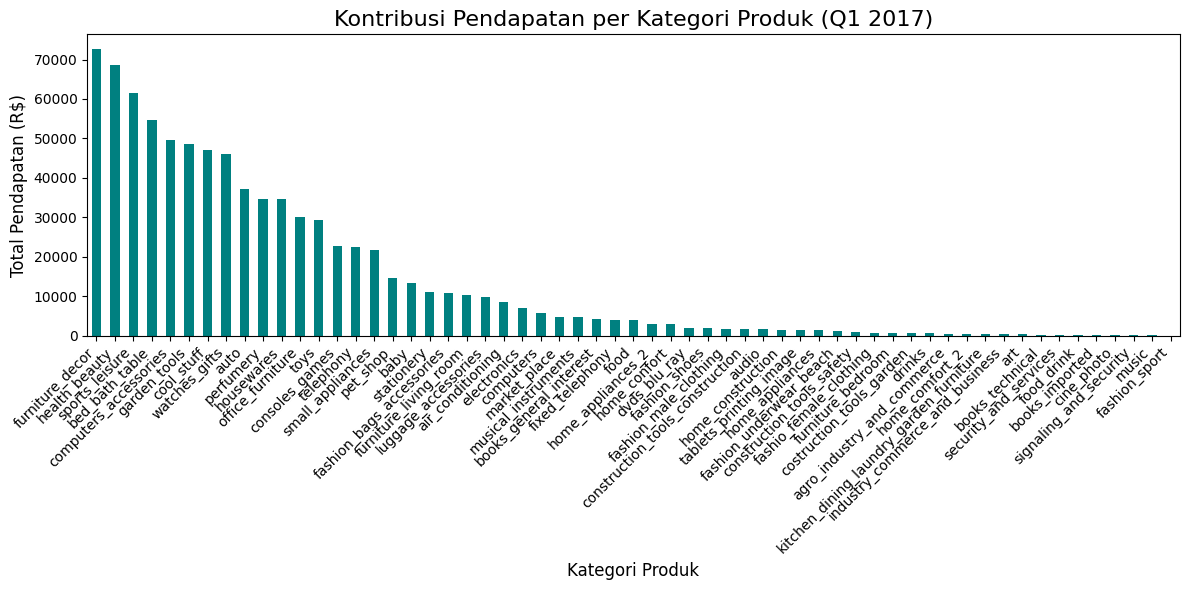

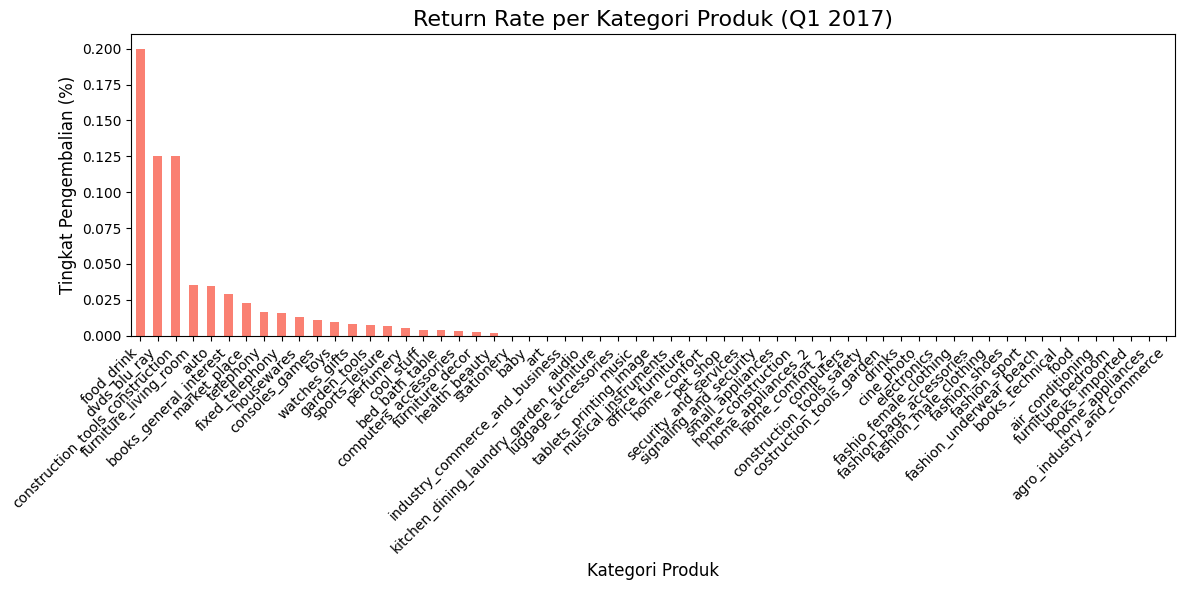

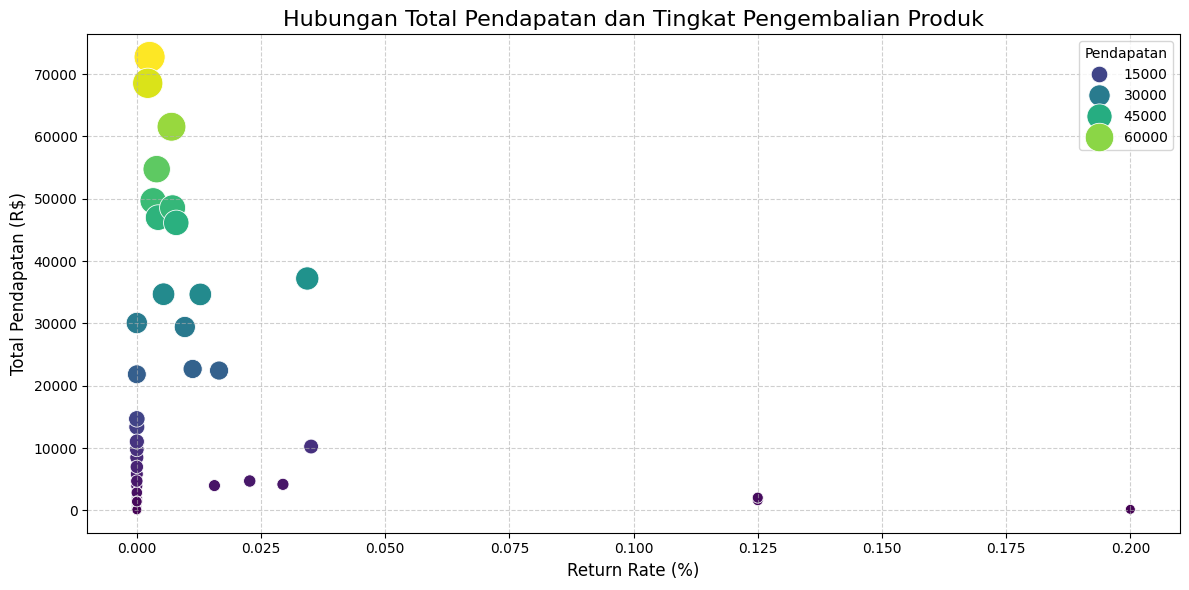

In [49]:
# Plot Kontribusi Pendapatan
plt.figure(figsize=(12, 6))
revenue_by_category.plot(kind='bar', color='teal')
plt.title('Kontribusi Pendapatan per Kategori Produk (Q1 2017)', fontsize=16)
plt.ylabel('Total Pendapatan (R$)', fontsize=12)
plt.xlabel('Kategori Produk', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("revenue_by_category_q1_2017.png")
plt.show()

# Plot Return Rate
plt.figure(figsize=(12, 6))
return_rate_by_category.plot(kind='bar', color='salmon')
plt.title('Return Rate per Kategori Produk (Q1 2017)', fontsize=16)
plt.ylabel('Tingkat Pengembalian (%)', fontsize=12)
plt.xlabel('Kategori Produk', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("return_rate_by_category_q1_2017.png")
plt.show()

# Scatter Plot untuk melihat pola hubungan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_metrics, x='return_rate', y='total_revenue', hue='total_revenue', size='total_revenue', sizes=(50, 500), palette='viridis')
plt.title('Hubungan Total Pendapatan dan Tingkat Pengembalian Produk', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Total Pendapatan (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Pendapatan", loc='upper right')
plt.tight_layout()
plt.savefig("correlation_revenue_return_rate.png")
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan

## Conclusion

- Conclusion pertanyaan 1
- Conclusion pertanyaan 2
- Conclusion pertanyaan 3